# **Capstone Project: Credit Card Fraud Detection**


In [1]:
from google.colab import drive

In [2]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#import libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('display.max_columns', 500)

**Importing data into the dataframe**

In [3]:
# Reading the train dataset
df_train =pd.read_csv('/content/drive/MyDrive/fraudTrain.csv/fraudTrain.csv')
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
# Reading the test dataset
df_test =pd.read_csv('/content/drive/MyDrive/fraudTest.csv/fraudTest.csv')
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
# Dropping the Unnamed column from both the dataframe
df_train.drop("Unnamed: 0",axis=1,inplace=True)
df_test.drop("Unnamed: 0",axis=1,inplace=True)

Inspecting the dataframes

In [6]:
# Inspecting shape of the data frame
print(df_train.shape)


(1296675, 22)


In [7]:
# Inspecting the shape of the data frame
print(df_test.shape)

(555719, 22)


In [8]:
# Check the summary of the train dataframe
df_train.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [9]:
# Check the summary of the test dataframe
df_test.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [12]:
# checking the missing values
df_train.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [13]:
# checking the missing values
df_test.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [14]:
# Unique values
df_train.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [15]:
# Unique values in each column

df_test.nunique()

trans_date_trans_time    544760
cc_num                      924
merchant                    693
category                     14
amt                       37256
first                       341
last                        471
gender                        2
street                      924
city                        849
state                        50
zip                         912
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
trans_num                555719
unix_time                544760
merch_lat                546490
merch_long               551770
is_fraud                      2
dtype: int64

In [16]:
#converting date columns to datetime format on train dataset
df_train["trans_date_trans_time"] = pd.to_datetime(df_train['trans_date_trans_time'])
df_train['trans_hour'] = df_train['trans_date_trans_time'].dt.hour
df_train['trans_day_of_week'] = df_train['trans_date_trans_time'].dt.day_name()
df_train['trans_year_month'] = df_train['trans_date_trans_time'].dt.to_period('M')
df_train['trans_date']=df_train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_train['trans_date']=pd.to_datetime(df_train['trans_date'])
df_train["dob"] = pd.to_datetime(df_train['dob'])
df_train['cust_age'] = np.round((pd.to_datetime('now') - df_train['dob']) / np.timedelta64(1, 'Y'))
df_train['age_at_trans'] = df_train['trans_date'] - df_train['dob']
df_train['age_at_trans'] = df_train['age_at_trans'].astype('timedelta64[Y]')

In [17]:
# Converting date columns to datetime format on train dataset
df_test["trans_date_trans_time"] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test['trans_hour'] = df_test['trans_date_trans_time'].dt.hour
df_test['trans_day_of_week'] = df_test['trans_date_trans_time'].dt.day_name()
df_test['trans_year_month'] = df_test['trans_date_trans_time'].dt.to_period('M')
df_test['trans_date']=df_test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_test['trans_date']=pd.to_datetime(df_test['trans_date'])
df_test["dob"] = pd.to_datetime(df_test['dob'])
df_test['cust_age'] = np.round((pd.to_datetime('now') - df_test['dob']) / np.timedelta64(1, 'Y'))
df_test['age_at_trans'] = df_test['trans_date'] - df_test['dob']
df_test['age_at_trans'] = df_test['age_at_trans'].astype('timedelta64[Y]')

In [18]:
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month,trans_date,cust_age,age_at_trans
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,2019-01-01,34.0,30.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,2019-01-01,44.0,40.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,2019-01-01,60.0,56.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,2019-01-01,55.0,51.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,2019-01-01,36.0,32.0


In [19]:
df_train.index = df_train['trans_date_trans_time']
df_train = df_train.sort_index()
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month,trans_date,cust_age,age_at_trans
trans_date_trans_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,2019-01-01,34.0,30.0
2019-01-01 00:00:44,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,2019-01-01,44.0,40.0
2019-01-01 00:00:51,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,2019-01-01,60.0,56.0
2019-01-01 00:01:16,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,2019-01-01,55.0,51.0
2019-01-01 00:03:06,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,2019-01-01,36.0,32.0


In [20]:
# Number of customer transactions in the last 60 days 
df_train['agg'] = 1
df_hist_trans_60d = df_train .groupby(['cc_num'])['agg'].rolling('60D').count().shift().reset_index().fillna(0)

df_hist_trans_60d.columns = ['cc_num','trans_date','hist_trans_60d']
df_hist_trans_60d['trans_date'] = df_hist_trans_60d['trans_date'].dt.date
df_hist_trans_60d = df_hist_trans_60d.groupby(['cc_num','trans_date'])['hist_trans_60d'].min().reset_index()

In [21]:
# Average transaction value of customers in the last 60 days 
df_hist_trans_amt_avg_60d = df_train .groupby(['cc_num'])['amt'].rolling('60D').sum().shift(1).reset_index().fillna(0)

df_hist_trans_amt_avg_60d.columns = ['cc_num','trans_date','hist_trans_avg_amt_60d']
df_hist_trans_amt_avg_60d['trans_date'] = df_hist_trans_amt_avg_60d['trans_date'].dt.date
df_hist_trans_amt_avg_60d = df_hist_trans_amt_avg_60d.groupby(['cc_num','trans_date'])['hist_trans_avg_amt_60d'].mean().reset_index()

In [22]:
# Merge Historical Variables with Transactions by ['cc_num','trans_date_trans_time'] using left join

df_train['trans_date'] = df_train['trans_date_trans_time'].dt.date
df_train = df_train.merge(df_hist_trans_amt_avg_60d.drop_duplicates(), left_on = ['cc_num','trans_date'], right_on = ['cc_num','trans_date'],how = 'left')
df_train = df_train.merge(df_hist_trans_60d.drop_duplicates(), left_on = ['cc_num','trans_date'], right_on = ['cc_num','trans_date'],how = 'left')

In [23]:
df_test.index = df_test['trans_date_trans_time']
df_test = df_test.sort_index()
df_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month,trans_date,cust_age,age_at_trans
trans_date_trans_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-21 12:14:25,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,12,Sunday,2020-06,2020-06-21,54.0,52.0
2020-06-21 12:14:33,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,12,Sunday,2020-06,2020-06-21,32.0,30.0
2020-06-21 12:14:53,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,12,Sunday,2020-06,2020-06-21,52.0,49.0
2020-06-21 12:15:15,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,12,Sunday,2020-06,2020-06-21,35.0,32.0
2020-06-21 12:15:17,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,12,Sunday,2020-06,2020-06-21,67.0,64.0


In [24]:
# Number of customer transcations in the last 60 days 
df_test['agg'] = 1
df_hist_trans_60d = df_test .groupby(['cc_num'])['agg'].rolling('60D').count().shift().reset_index().fillna(0)

df_hist_trans_60d.columns = ['cc_num','trans_date','hist_trans_60d']
df_hist_trans_60d['trans_date'] = df_hist_trans_60d['trans_date'].dt.date
df_hist_trans_60d = df_hist_trans_60d.groupby(['cc_num','trans_date'])['hist_trans_60d'].min().reset_index()

In [25]:
# Average order value of customers in the last 60 days 
df_hist_trans_amt_avg_60d = df_test .groupby(['cc_num'])['amt'].rolling('60D').sum().shift(1).reset_index().fillna(0)

df_hist_trans_amt_avg_60d.columns = ['cc_num','trans_date','hist_trans_avg_amt_60d']
df_hist_trans_amt_avg_60d['trans_date'] = df_hist_trans_amt_avg_60d['trans_date'].dt.date
df_hist_trans_amt_avg_60d = df_hist_trans_amt_avg_60d.groupby(['cc_num','trans_date'])['hist_trans_avg_amt_60d'].mean().reset_index()

In [26]:
# Merge Historical Variables with Transactions by ['cc_num','trans_date_trans_time'] using left join
df_test['trans_date'] = df_test['trans_date_trans_time'].dt.date
df_test = df_test.merge(df_hist_trans_amt_avg_60d.drop_duplicates(), left_on = ['cc_num','trans_date'], right_on = ['cc_num','trans_date'],how = 'left')
df_test = df_test.merge(df_hist_trans_60d.drop_duplicates(), left_on = ['cc_num','trans_date'], right_on = ['cc_num','trans_date'],how = 'left')

In [27]:
df_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month,trans_date,cust_age,age_at_trans,agg,hist_trans_avg_amt_60d,hist_trans_60d
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,12,Sunday,2020-06,2020-06-21,54.0,52.0,1,10060.720000,1.0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,12,Sunday,2020-06,2020-06-21,32.0,30.0,1,1018.875000,1.0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,12,Sunday,2020-06,2020-06-21,52.0,49.0,1,6565.473333,1.0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,12,Sunday,2020-06,2020-06-21,35.0,32.0,1,13428.150000,1.0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,12,Sunday,2020-06,2020-06-21,67.0,64.0,1,3452.952500,1.0


In [28]:
# Binning the 'customer_age' column 
df_train['customer_age_group'] = pd.cut(df_train['age_at_trans'], bins=[10,20,30,40,50,60,1000], labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60 - Above'])
df_test['customer_age_group'] = pd.cut(df_train['age_at_trans'], bins=[10,20,30,40,50,60,1000], labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60 - Above'])

In [29]:
# Binary mapping on Gender feature
df_train['gender'] = df_train['gender'].map({'M': 1, 'F': 0})
df_test['gender'] = df_test['gender'].map({'M': 1, 'F': 0})

**Exploratory Data Analysis**

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 32 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   trans_date_trans_time   1296675 non-null  datetime64[ns]
 1   cc_num                  1296675 non-null  int64         
 2   merchant                1296675 non-null  object        
 3   category                1296675 non-null  object        
 4   amt                     1296675 non-null  float64       
 5   first                   1296675 non-null  object        
 6   last                    1296675 non-null  object        
 7   gender                  1296675 non-null  int64         
 8   street                  1296675 non-null  object        
 9   city                    1296675 non-null  object        
 10  state                   1296675 non-null  object        
 11  zip                     1296675 non-null  int64         
 12  lat           

**Univariate Analysis on Categorical Variables**

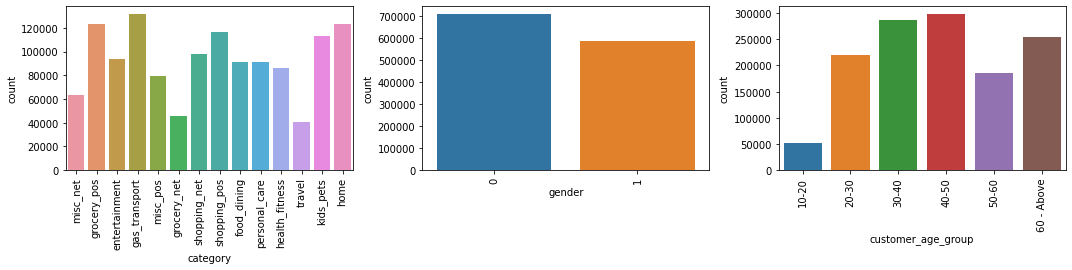

In [31]:
# visualising the categorical variables
fig= plt.figure(figsize=(15, 10))
plt.subplot(3,3,1)
sns.countplot(df_train['category'])
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.countplot(df_train["gender"])
plt.xticks(rotation = 90)

plt.subplot(3,3,3)
sns.countplot(df_train["customer_age_group"])
plt.xticks(rotation = 90)
fig.tight_layout()

plt.show()


**Observation:**
1. Maximum number of transactions occurs for gas transport, home and grocery_pos categories and minimum transactions are for travel.
2. There are more female customers compared to male customers.
3. Maximum number of transactions occurs for both 30-40 and 40-50  age categories.



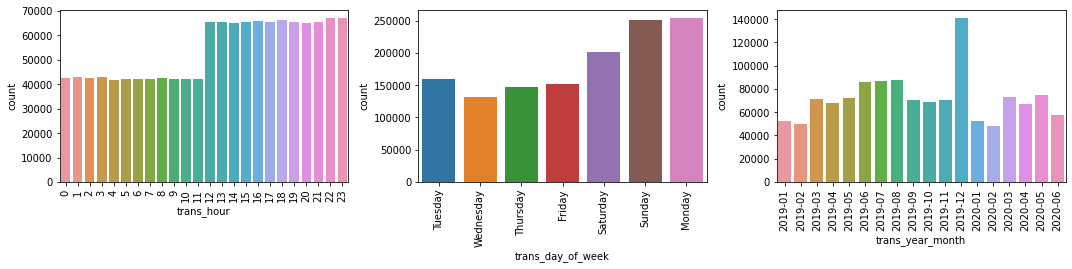

In [32]:
# visualising the categorical variables
fig= plt.figure(figsize=(15, 10))
plt.subplot(3,3,1)
sns.countplot(df_train['trans_hour'])
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.countplot(df_train['trans_day_of_week'])
plt.xticks(rotation = 90)

plt.subplot(3,3,3)
sns.countplot(df_train['trans_year_month'])
plt.xticks(rotation = 90)
fig.tight_layout()

plt.show()

**Observation:**

1.   Maximum Fradulent transactions took place between 12pm and 11pm.
2.   Maximum number of transactions takes place on both Sunday and Monday.
3.   Maximum number of transcations occurs on December 2019 and minimum during February 2020.



**Univariate Analysis on Numerical variables**

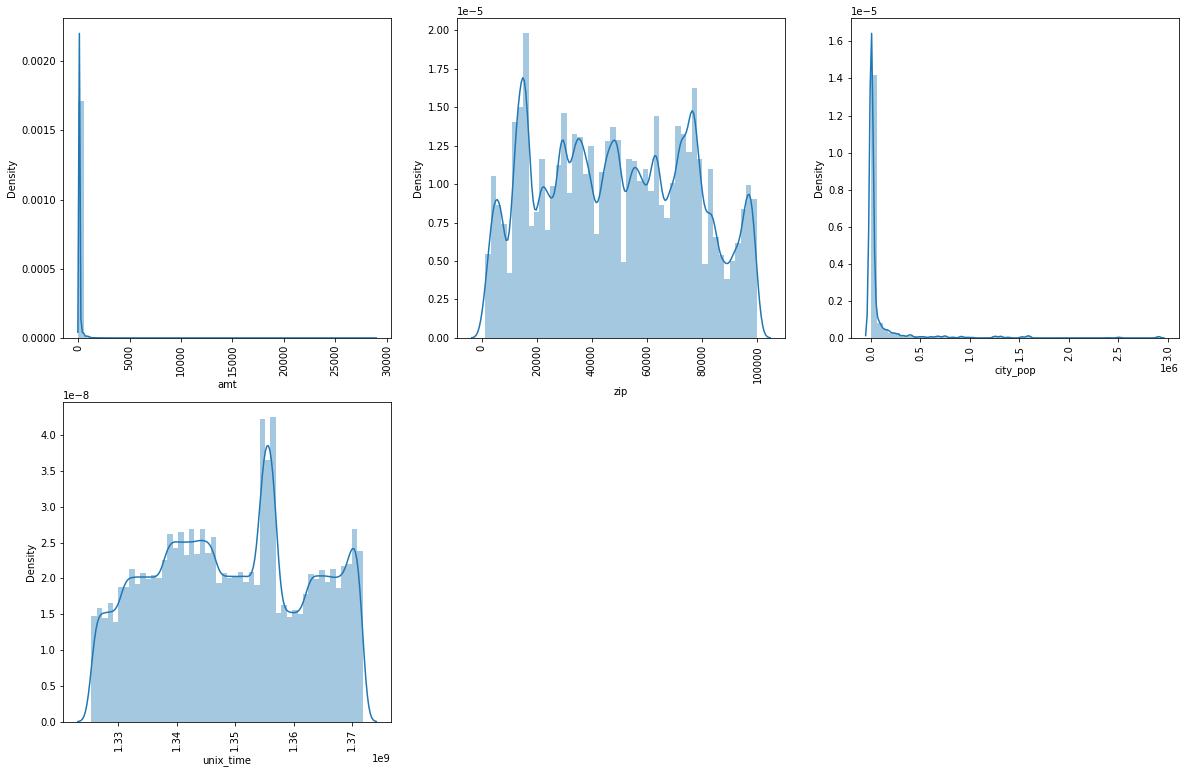

In [33]:
# visualising the numerical variables
fig= plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.distplot(df_train['amt'])
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.distplot(df_train['zip'])
plt.xticks(rotation = 90)

plt.subplot(3,3,3)
sns.distplot(df_train['city_pop'])
plt.xticks(rotation = 90)

plt.subplot(3,3,4)
sns.distplot(df_train['unix_time'])
plt.xticks(rotation = 90)
plt.show()

**Observations:**

1. The maximum number of transactions are at between unix time between 1.35-1.36.
2. The city with the zip code of 18000 has the maximimum number of both fraud and non-fraudulent transactions.
3. The people at city with the population of 0.1 are doing the maximum transaction.



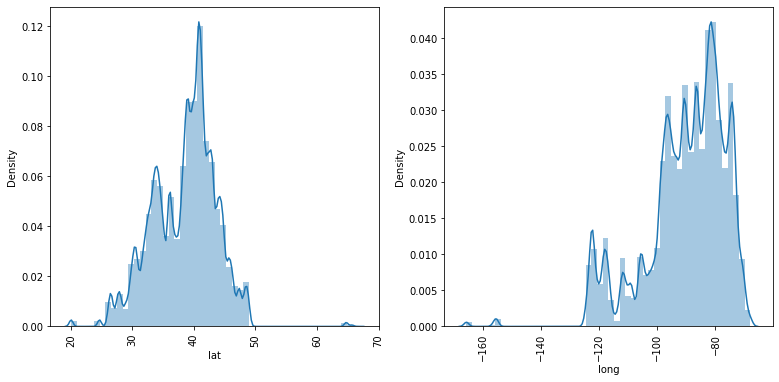

In [34]:
# visualising the numerical variables
fig= plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.distplot(df_train['lat'])
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.distplot(df_train['long'])
plt.xticks(rotation = 90)
plt.show()

**Observations:**

1. The highest number of transaction is at the latitude between 40 and 50.
2. The highest number of transaction is at the longitude between -100 and -80.



**Bivariate Analysis for Numerical Variable**

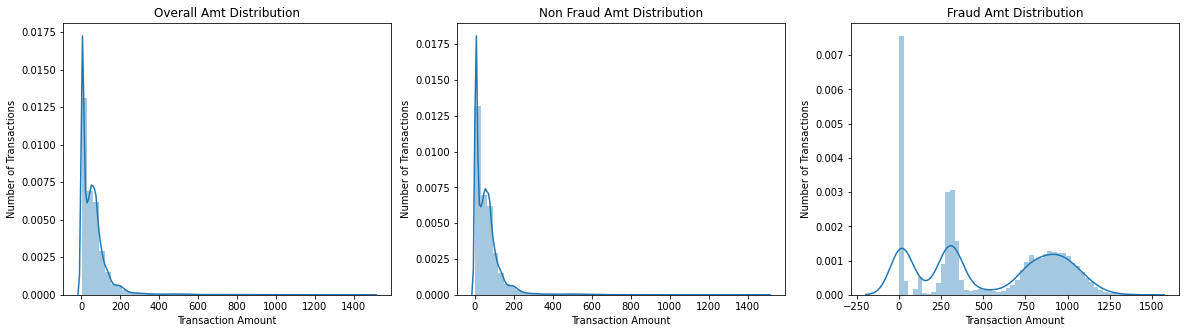

In [35]:
#distribution of transaction amount by different fraudulent and non-fraudulent categories
fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(df_train[df_train['amt'] <= 1500]['amt'], bins = 50)
plt.title('Overall Amt Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Number of Transactions')

plt.subplot(1,3,2)
sns.distplot(df_train[(df_train.is_fraud == 0) & (df_train['amt'] <= 1500)]['amt'], bins = 50)
plt.title('Non Fraud Amt Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Number of Transactions')

plt.subplot(1,3,3)
sns.distplot(df_train[(df_train.is_fraud == 1) & (df_train['amt'] <= 1500)]['amt'], bins=50)
plt.title('Fraud Amt Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Number of Transactions')
plt.show()


In [36]:
#distribution of  transaction amount genders
df_gender = df_train[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']
df_gender.head()

#distribution of gender among different fraudulent and non-fraudulent categories
df_fraud = df_train[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud.columns = ['Gender','is_fraud','count']
df_fraud = df_fraud.merge(df_gender[['Gender','gender_count']],how = 'inner',left_on = 'Gender',right_on = 'Gender')
df_fraud['percent'] = (df_fraud['count']/df_fraud['gender_count'])*100
df_fraud.head()

,Gender,is_fraud,count,gender_count,percent
0,0,0,706128,709863,99.473842
1,0,1,3735,709863,0.526158
2,1,0,583041,586812,99.357375
3,1,1,3771,586812,0.642625


Male customers are more prone to fraudelent activities than the female customers.

In [37]:
#adding the category column for better analysis
df_gender = df_train[['category','trans_num']].groupby(['category']).count().reset_index()
df_gender.columns = ['category','category_count']
df_gender.head()

#distribution of categories among different fraudulent and non-fraudulent categories
df_fraud = df_train[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud.columns = ['category','is_fraud','count']
df_fraud = df_fraud.merge(df_gender[['category','category_count']],how = 'inner',left_on = 'category',right_on = 'category')
df_fraud['percent'] = (df_fraud['count']/df_fraud['category_count'])*100
df_fraud

,category,is_fraud,count,category_count,percent
0,entertainment,0,93781,94014,99.752165
1,entertainment,1,233,94014,0.247835
2,food_dining,0,91310,91461,99.834902
3,food_dining,1,151,91461,0.165098
4,gas_transport,0,131041,131659,99.530606
5,gas_transport,1,618,131659,0.469394
6,grocery_net,0,45318,45452,99.705183
7,grocery_net,1,134,45452,0.294817
8,grocery_pos,0,121895,123638,98.590239
9,grocery_pos,1,1743,123638,1.409761


Maximum number of fraud transactions are among shopping and grocery categories.

**Visualizing variables in association with Fraud**

In [38]:
fraud = df_train[(df_train['is_fraud']==1)] 

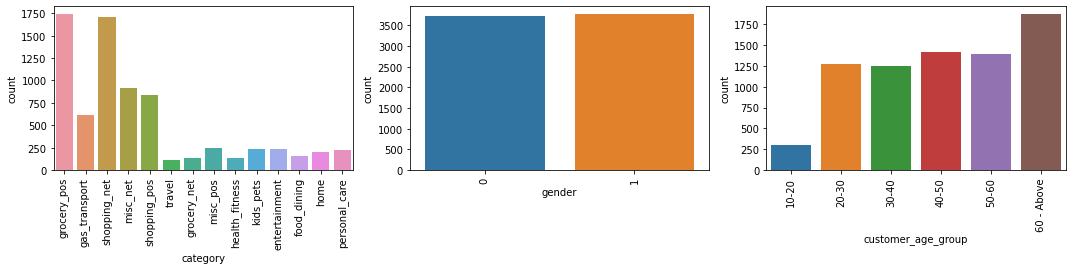

In [39]:
#plotting graph to analyze the categorical variables in association with fraud
fig= plt.figure(figsize=(15, 10))
plt.subplot(3,3,1)
sns.countplot(fraud['category'])
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.countplot(fraud["gender"])
plt.xticks(rotation = 90)

plt.subplot(3,3,3)
sns.countplot(fraud["customer_age_group"])
plt.xticks(rotation = 90)
fig.tight_layout()

plt.show()

**Observations**

1. Maximum number of fraud transactions are among shopping and grocery categories.
2. There are no critical differnce for genders with respect to fraud transactions.
3. Maximum number of fraud transactions are among the age category 60 and above.



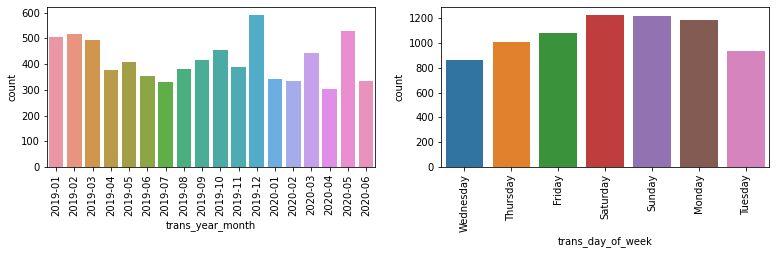

In [40]:
# visualising the categorical variables
fig= plt.figure(figsize=(20, 10))
plt.subplot(3,3,1)
sns.countplot(fraud['trans_year_month'])
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.countplot(fraud["trans_day_of_week"])
plt.xticks(rotation = 90)
plt.show()

**Observations:**

1. Maximum number of fraudulent transactions occured during December 2019.
2. Maximum number of fraudulent transactions occured on Saturday, Sunday and Monday.



**Checking Class Imbalance**

**Train dataset**

In [41]:
df_fraud = df_train[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df_fraud.columns = ['is_fraud','count']
df_fraud['percentage'] = np.round((df_fraud['count']/df_fraud['count'].sum())*100,2)
df_fraud

,is_fraud,count,percentage
0,0,1289169,99.42
1,1,7506,0.58


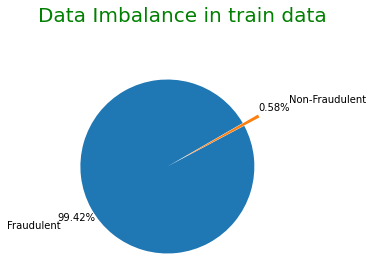

In [42]:
# Plotting Imbalance
label = ['Fraudulent','Non-Fraudulent']
values = [df_fraud['percentage'][0], df_fraud['percentage'][1]]

explode = (0.2, 0)
fig1, ax1 = plt.subplots()
ax1.pie(values,labels = label, explode = explode, autopct='%0.2f%%', shadow = False, startangle = 30, pctdistance = 1.2, labeldistance = 1.4)
plt.title("Data Imbalance in train data\n",fontdict = {'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

**Test dataset**

In [43]:
df_fraud=df_test[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df_fraud.columns=['is_fraud','count']
df_fraud['percentage']=np.round((df_fraud['count']/df_fraud['count'].sum())*100,2)
df_fraud

,is_fraud,count,percentage
0,0,553574,99.61
1,1,2145,0.39


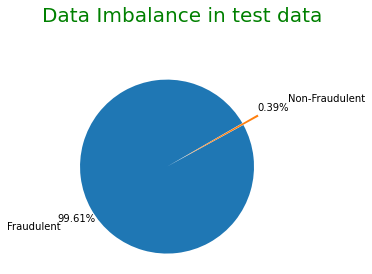

In [44]:
label = ['Fraudulent','Non-Fraudulent']
values = [df_fraud['percentage'][0], df_fraud['percentage'][1]]

explode = (0.2, 0)
fig1, ax1 = plt.subplots()
ax1.pie(values,labels = label, explode = explode, autopct = '%0.2f%%', shadow = False, startangle = 30, pctdistance = 1.2, labeldistance = 1.4)
plt.title("Data Imbalance in test data\n",fontdict = {'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

The train and test data sets are highly imbalanced.

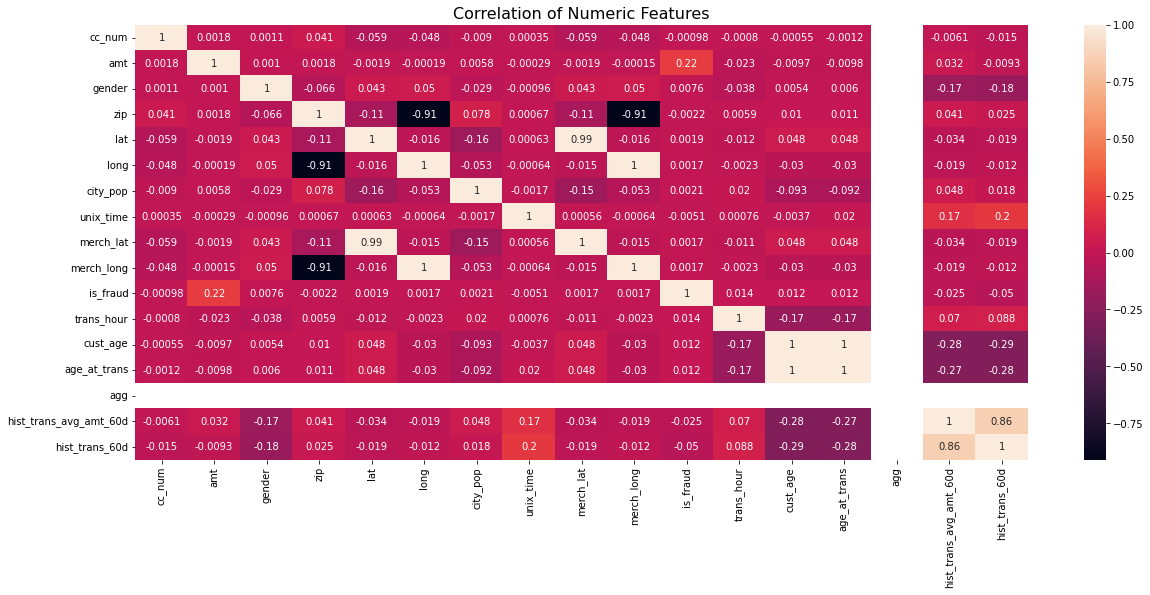

In [45]:
#Plotting a heatmap for correlation for numeric variables
f,ax = plt.subplots(figsize = (20,8))
plt.title('Correlation of Numeric Features',y = 1,size = 16)
sns.heatmap(df_train.corr(),annot = True)
plt.show()

**Observations:**

1. we observe high corelation between customer age during transaction and transaction hour.
2. we  similarly also observe high corelation between gender and other historical variables.




**One Hot-Encoding for train dataset**

In [46]:
#creating dummy variable for categorical variables for train dataset
category_dummy = pd.get_dummies(df_train.category, prefix = 'category', drop_first = True)
gender_dummy = pd.get_dummies(df_train.gender, prefix = 'gender', drop_first = True)
trans_day_of_week_dummy = pd.get_dummies(df_train.trans_day_of_week, prefix = 'week',drop_first = True)
customer_age_group_dummy = pd.get_dummies(df_train.customer_age_group, prefix = 'age',drop_first = True)
trans_hour_dummy = pd.get_dummies(df_train.trans_hour, prefix = 'hour',drop_first = True)

In [47]:
#Adding the results to the master dataframe
df1 = pd.concat([df_train, category_dummy,gender_dummy,customer_age_group_dummy,trans_hour_dummy,trans_day_of_week_dummy], axis = 1)


In [48]:
# Drop the variables for which the dummy variables have been created
df1 = df1.drop(['category','gender','customer_age_group','trans_hour','trans_day_of_week'] ,axis = 1)

In [49]:
#dropping other variables which seem irrelavant fot the analysis
drop_col = ['trans_date_trans_time','cc_num','first','last','street','city','lat','long','dob','trans_num','merch_lat','merch_long','agg','cust_age','age_at_trans','trans_date', 'trans_year_month','merchant','city','zip','job','city_pop','state','unix_time']
df1 = df1.drop(drop_col, axis = 1)

In [50]:
df1.head()

,amt,is_fraud,hist_trans_avg_amt_60d,hist_trans_60d,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_1,age_20-30,age_30-40,age_40-50,age_50-60,age_60 - Above,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday
0,4.97,0,2028.123333,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,107.23,0,625.771000,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,220.11,0,3023.400000,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,45.00,0,6102.775000,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,41.96,0,3546.330000,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


**One Hot-Encoding for test dataset**

In [51]:
#creating dummy variable for categorical variables for test dataset
category_dummy = pd.get_dummies(df_test.category, prefix = 'category', drop_first = True)
gender_dummy = pd.get_dummies(df_test.gender, prefix = 'gender', drop_first = True)
trans_day_of_week_dummy = pd.get_dummies(df_test.trans_day_of_week, prefix = 'week',drop_first = True)
customer_age_group_dummy = pd.get_dummies(df_test.customer_age_group, prefix = 'age',drop_first = True)
trans_hour_dummy = pd.get_dummies(df_test.trans_hour, prefix = 'hour',drop_first = True)

In [52]:
#Adding the results to the master dataframe
df2 = pd.concat([df_test, category_dummy,gender_dummy,trans_day_of_week_dummy,customer_age_group_dummy,trans_hour_dummy], axis = 1)

In [53]:
# Dropping the variables for which the dummy variables have been created
df2 = df2.drop(['category','gender','trans_day_of_week','customer_age_group','trans_hour'] ,axis = 1)

In [54]:
#dropping other variables which seem irrelavant fot the analysis
drop_cols = ['trans_date_trans_time','cc_num','first','last','street','city','lat','long','dob','trans_num','merch_lat','merch_long','agg','cust_age','age_at_trans','trans_date', 'trans_year_month','merchant','city','zip','job','city_pop','state','unix_time']
df2 = df2.drop(drop_cols,axis=1)

In [55]:
df1.shape

(1296675, 52)

In [56]:
df2.shape

(555719, 52)

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 52 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   is_fraud                 1296675 non-null  int64  
 2   hist_trans_avg_amt_60d   1296675 non-null  float64
 3   hist_trans_60d           1296675 non-null  float64
 4   category_food_dining     1296675 non-null  uint8  
 5   category_gas_transport   1296675 non-null  uint8  
 6   category_grocery_net     1296675 non-null  uint8  
 7   category_grocery_pos     1296675 non-null  uint8  
 8   category_health_fitness  1296675 non-null  uint8  
 9   category_home            1296675 non-null  uint8  
 10  category_kids_pets       1296675 non-null  uint8  
 11  category_misc_net        1296675 non-null  uint8  
 12  category_misc_pos        1296675 non-null  uint8  
 13  category_personal_care   1296675 non-null 

**Data Preparation**

**Splitting the dataset**

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
#Putting feature and response variable to X and y
X_train = df1.drop("is_fraud", axis = 1)
y_train = df1['is_fraud']

X_test = df2.drop("is_fraud", axis = 1)
y_test = df2['is_fraud']

In [60]:
X_train.shape

(1296675, 51)

In [61]:
X_test.shape

(555719, 51)

In [62]:
scaled_vars = ['amt','hist_trans_avg_amt_60d','hist_trans_60d']

scaler = StandardScaler()
X_train[scaled_vars] = scaler.fit_transform(X_train[scaled_vars])
X_test[scaled_vars] = scaler.transform(X_test[scaled_vars])

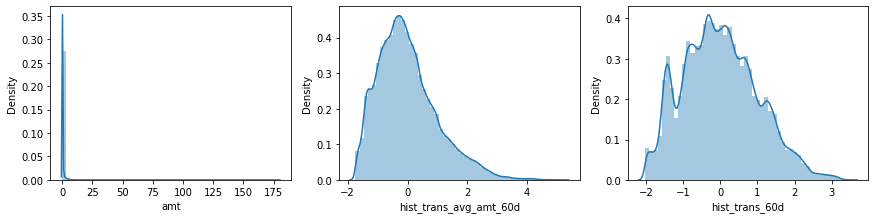

In [63]:
# plotting the histogram to visualise the skewness
plt.figure(figsize=(25,30))
i=0
for col in scaled_vars:
    i += 1
    plt.subplot(8,5, i)
    sns.distplot(X_train[col])
plt.show()

**Fixing the skewness**

In [64]:
# Handling the skewness of the distribution

# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate the powertransformer
pt = PowerTransformer(copy=False)

# Fit and transform the PT on training data
X_train[scaled_vars] = pt.fit_transform(X_train[scaled_vars])

# Transform the test set
X_test[scaled_vars] = pt.transform(X_test[scaled_vars])

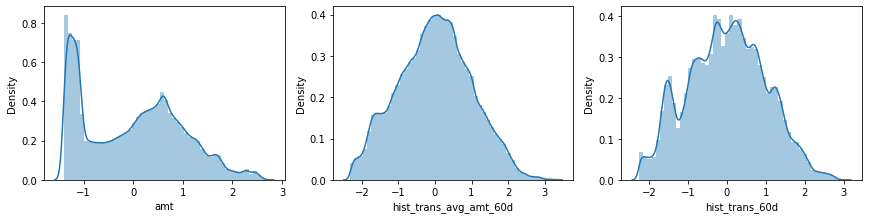

In [65]:
# plotting the histogram to see the skewness
plt.figure(figsize=(25,30))
i=0
for col in scaled_vars:
    i += 1
    plt.subplot(8,5, i)
    sns.distplot(X_train[col])
plt.show()

**Model Building using Logistic Regression**

In [66]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train) 

LogisticRegression()

**Balancing the data**

In [67]:
# Importing over_sampling
from imblearn import over_sampling

# Instantiating ADASYN
res = over_sampling.ADASYN(random_state=0)

# Fitting ADASYN to the train set
X_train_adasyn, y_train_adasyn = res.fit_resample(X_train, y_train)

In [68]:
print('Before ADASYN oversampling X_train shape=',X_train.shape)
print('After ADASYN oversampling X_train shape=',X_train_adasyn.shape)

Before ADASYN oversampling X_train shape= (1296675, 51)
After ADASYN oversampling X_train shape= (2577994, 51)


In [69]:
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

In [70]:
# Call RandomizedSearchCV()
model_cv = RandomizedSearchCV(estimator = LogisticRegression(),
                        param_distributions = params, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True) 

In [71]:
#fitting the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100, 1000]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [72]:
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Best ROC AUC score:  0.9654496190327702
Best hyperparameters:  {'C': 1}


In [73]:
#cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,37.924954,1.850092,0.322173,0.005639,0.01,{'C': 0.01},0.966193,0.961670,0.966666,0.966458,0.965334,0.965264,0.001854,6,0.966148,0.966758,0.965385,0.965574,0.965799,0.965933,0.000485
1,43.662705,1.646502,0.323867,0.008573,0.1,{'C': 0.1},0.966009,0.962142,0.966804,0.966795,0.965490,0.965448,0.001726,5,0.966343,0.966937,0.965561,0.965756,0.965980,0.966115,0.000486
2,44.159816,2.319014,0.374017,0.080666,1,{'C': 1},0.965969,0.962176,0.966798,0.966817,0.965488,0.965450,0.001713,1,0.966348,0.966939,0.965563,0.965759,0.965982,0.966118,0.000486
3,47.947025,3.509411,0.347269,0.015846,10,{'C': 10},0.965964,0.962180,0.966797,0.966819,0.965487,0.965450,0.001712,2,0.966348,0.966939,0.965563,0.965759,0.965982,0.966118,0.000486
4,44.765823,3.359846,0.342886,0.010061,100,{'C': 100},0.965964,0.962180,0.966797,0.966820,0.965487,0.965450,0.001712,3,0.966348,0.966939,0.965563,0.965759,0.965982,0.966118,0.000486
5,44.978311,3.348436,0.342230,0.004271,1000,{'C': 1000},0.965964,0.962180,0.966796,0.966819,0.965487,0.965449,0.001712,4,0.966348,0.966939,0.965563,0.965759,0.965982,0.966118,0.000486


In [74]:
#Logistic regression with optimal value
# Instantiating the model
logreg_adasyn_model = LogisticRegression(C=1000)

#fitting the model 
logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000)

**Evaluating on train data**

In [75]:
# Evaluating on train data
y_train_pred = logreg_adasyn_model.predict(X_train_adasyn)

print(f"F1 Score: {round(metrics.f1_score(y_train_adasyn, y_train_pred)*100,2)}%") 
print(metrics.classification_report(y_train_adasyn, y_train_pred))

F1 Score: 91.32%
              precision    recall  f1-score   support

           0       0.93      0.89      0.91   1289169
           1       0.89      0.93      0.91   1288825

    accuracy                           0.91   2577994
   macro avg       0.91      0.91      0.91   2577994
weighted avg       0.91      0.91      0.91   2577994



In [77]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[1146762  142407]
 [  86256 1202569]]


**Plotting the ROC curve**

In [78]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [79]:
# Predicted probability
y_train_pred_proba = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]

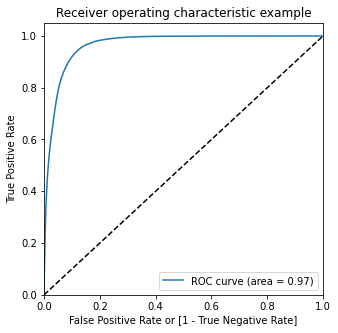

In [80]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [81]:
print('Logreg model train AUC =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba )

Logreg model train AUC = 0.9659805295517119


**Evaluating on test data**

In [82]:
# Evaluating on test data
y_pred = logreg_adasyn_model.predict(X_test)


In [84]:
print(f"F1 Score: {round(metrics.f1_score(y_test, y_pred)*100,2)}%") 
print(metrics.classification_report(y_test, y_pred))

F1 Score: 3.13%
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    553574
           1       0.02      0.29      0.03      2145

    accuracy                           0.93    555719
   macro avg       0.51      0.61      0.50    555719
weighted avg       0.99      0.93      0.96    555719



In [87]:
#confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

[[517092  36482]
 [  1531    614]]


In [88]:
# Predicted probability
y_test_pred_proba = logreg_adasyn_model.predict_proba(X_test)[:,1]

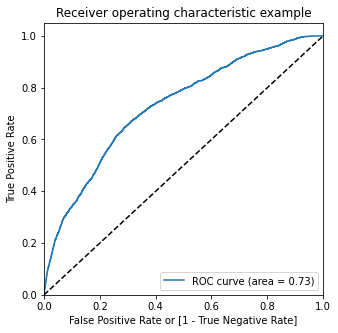

In [89]:
# Plotting the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

**Train set**

AUC-ROC: 0.97

**Test set**

AUC-ROC: 0.73

**Model Building using Decision Tree**



In [90]:
params = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

In [91]:
# Instantiate the grid search model
dtree = DecisionTreeClassifier()

In [92]:
model_cv = RandomizedSearchCV(estimator = dtree, 
                           param_distributions = params, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

In [93]:
# Fitting the model
model_cv.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(5, 15, 5),
                                        'min_samples_leaf': range(50, 150, 50),
                                        'min_samples_split': range(50, 150, 50)},
                   scoring='roc_auc', verbose=1)

In [94]:
#printing the optimal roc score
print('Best ROC AUC score: ', model_cv.best_score_)
#printing the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_estimator_)

Best ROC AUC score:  0.980891877409686
Best hyperparameters:  DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [95]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 0,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=0)

**Evaluating on train data**

In [96]:
# Evaluating the model on the train dataset
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)

print(f"F1 Score: {round(metrics.f1_score(y_train_adasyn, y_train_pred)*100,2)}%") 
print(metrics.classification_report(y_train_adasyn, y_train_pred))

F1 Score: 95.18%
              precision    recall  f1-score   support

           0       0.96      0.94      0.95   1289169
           1       0.94      0.96      0.95   1288825

    accuracy                           0.95   2577994
   macro avg       0.95      0.95      0.95   2577994
weighted avg       0.95      0.95      0.95   2577994



In [98]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[1209653   79516]
 [  46257 1242568]]


In [99]:
# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]

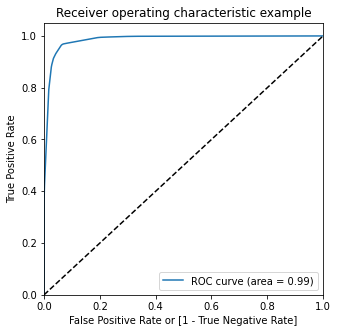

In [100]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

**Evaluating on test data**

In [101]:
# Evaluating model on the test data
y_test_pred = dt_adasyn_model.predict(X_test)


print(f"F1 Score: {round(metrics.f1_score(y_test, y_test_pred)*100,2)}%") 
print(metrics.classification_report(y_test, y_test_pred))

F1 Score: 9.92%
              precision    recall  f1-score   support

           0       1.00      0.93      0.97    553574
           1       0.05      0.93      0.10      2145

    accuracy                           0.93    555719
   macro avg       0.53      0.93      0.53    555719
weighted avg       1.00      0.93      0.96    555719



In [102]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[517419  36155]
 [   147   1998]]


In [103]:
# Predicted probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]

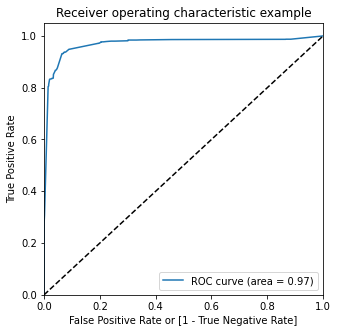

In [104]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

**Train set**

AUC-ROC: 0.99

**Test set**

AUC-ROC: 0.97


**Model Building using XGBoost**



In [105]:
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}  

In [106]:
# Instantiate the grid search model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

In [107]:
# set up RandomizedSearchCV()
model_cv = RandomizedSearchCV(estimator = xgb_model, 
                        param_distributions = param_grid, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True) 

In [ ]:
#fitting the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [ ]:
#printing the optimal roc score
print('Best ROC AUC score: ', model_cv.best_score_)
#printing the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_estimator_)

In [ ]:
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

In [ ]:
#model with optimal hyperparameters
xgb_adasyn_model = XGBClassifier(params = params)

In [ ]:
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

**Evaluating on train data**

In [ ]:
#predicting on the train set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)

#printing the scores
print(f"F1 Score: {round(metrics.f1_score(y_train_adasyn, y_train_pred)*100,2)}%") 
print(metrics.classification_report(y_train_adasyn, y_train_pred))

In [ ]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

In [ ]:
#predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]


In [ ]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [ ]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba )

**Evaluating on test data**

In [ ]:
y_test_pred = xgb_adasyn_model.predict(X_test)

In [ ]:
print(f"F1 Score: {round(metrics.f1_score(y_test, y_test_pred)*100,2)}%") 
print(metrics.classification_report(y_test, y_test_pred))

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

In [ ]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]


In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

**Train set**

AUC-ROC: 0.99

**Test set**

AUC-ROC: 0.98

**Cost Benefit Anaysis**

In [ ]:
#creating the Subset of non- Predicted Train Dataset
df_train_subset = df_train[['trans_date_trans_time','trans_year_month','cc_num','amt','trans_num','is_fraud']]
df_train_subset.head()

In [ ]:
#creating dataframe of y_train_pred
df_train_pred = pd.DataFrame(y_train_pred)
df_train_pred.head()

In [ ]:
#merging the two dataframes
df_train_final = pd.concat([df_train_subset, df_train_pred],axis=1)
df_train_final.head()

In [ ]:
#renaming the column
df_train_final= df_train_final.rename(columns={ 0 : 'is_fraud_pred'})
df_train_final.head()

In [ ]:
df_train_final.groupby('is_fraud')['is_fraud'].count()

In [ ]:
df_train_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

In [ ]:
#subset of df_test
df_test_subset = df_test[['trans_date_trans_time','trans_year_month','cc_num','amt','trans_num','is_fraud']]
df_test_subset.head()

In [ ]:
#creating dataframe of y_test_pred

df_test_pred = pd.DataFrame(y_test_pred)
df_test_pred.head()

In [ ]:
#merging the two dataframes
df_test_final = pd.concat([df_test_subset, df_test_pred],axis=1)
df_test_final.head()

In [ ]:
#renaming the column
df_test_final= df_test_final.rename(columns={ 0 : 'is_fraud_pred'})
df_test_final.head()

In [ ]:
df_test_final.groupby('is_fraud')['is_fraud'].count()

In [ ]:
df_test_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

In [ ]:
#merging both train and test dataset for cost benefit analysis

df_merged = pd.concat([df_train_final, df_test_final],axis=0)
df_merged.head()

In [ ]:
#Number of transactions and number of customers seen per month 

trans_df= df_merged.groupby(df_merged['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
trans_df.columns = ['year_month','Number of Transactions','Number of customers']
trans_df

In [ ]:
#Number of fraud transctions and fraud customers seen per month

fraud_trans_df = df_merged[df_merged['is_fraud']==1]

fraud_trans_df = fraud_trans_df.groupby(fraud_trans_df['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
fraud_trans_df.columns = ['year_month','Number of fraud Transactions','Number of fraud customers']
fraud_trans_df

**Part I: Analyse the dataset and find the following figures**


*   Average number of transactions per month
*   Average number of fraudulent transactions per month
*   Average amount per fraudulent transaction


 





In [ ]:
#Average Number of transactions by year_month
a = round(trans_df['Number of Transactions'].mean(),2)
print(round(a,2))

In [ ]:
#Average number of fraudulent transactions per year_month(b)
b = round(fraud_trans_df['Number of fraud Transactions'].mean(),2)
print(round(b,2))

In [ ]:
# Average amount per fraud transaction(c)
c = round(df_merged[df_merged['is_fraud']==1].amt.mean(),2)
print(round(c,2))

**Part II: Compare the cost incurred per month by the bank before and after the model deployment**

Cost incurred per month before the model was deployed = Average amount per fraudulent transaction * Average number of fraudulent transactions per month

Cost incurred per month after the model is built and deployed: Let TF be the average number of transactions per month detected as fraudulent by the model and let the cost of providing customer executive support per fraudulent transaction detected by the model = $1.5

Total cost of providing customer support per month for fraudulent transactions detected by the model = 1.5 * TF. Let FN be the average number of transactions per month that are fraudulent but not detected by the model

Cost incurred due to these fraudulent transactions left undetected by the model = Average amount per fraudulent transaction * FN

Therefore, the cost incurred per month after the model is built and deployed = 1.5*TF + Average amount per fraudulent transaction * FN

Final savings = Cost incurred before - Cost incurred after.

In [ ]:
#Cost incurred per month before the model was deployed (b*c)
#fraud_trans_df['Number of fraud Transactions'].mean()*df_merged[df_merged['is_fraud']==1].amt.mean()
print(round(b*c,2))

In [ ]:
# Average number of transactions per month detected as fraudulent by the model (TF)
TF = round(df_merged[df_merged['is_fraud_pred']==1].trans_num.count()/24,2)
print(TF)


In [ ]:
# Cost of providing customer executive support per fraudulent transaction detected by the model = $1.5
# Total cost of providing customer support per month for fraudulent transactions detected by the model (TF*$1.5)
# df_merged[df_merged['is_fraud_pred']==1].trans_num.count()/24*1.5
customer_support_cost = round(TF*1.5,2)
print(customer_support_cost)

In [ ]:
# Average number of transactions per month that are fraudulent but not detected by the model (FN)
undetected_frauds = df_merged.loc[(df_merged.is_fraud_pred==0) & (df_merged.is_fraud==1)]
FN = round(undetected_frauds.trans_num.count()/24,2)
print(FN)

In [ ]:
#cost incurred due to fraudulent transactions left undetected by the model (FN*c)

#undetected_frauds.trans_num.count()/24 * df_merged[df_merged['is_fraud']==1].amt.mean()
undetected_fraud_cost = round(FN*c,2)
print(undetected_fraud_cost)

In [ ]:
# Cost incurred per month after the model is built and deployed 
#model_cost = round(df_merged[df_merged['is_fraud_pred']==1].trans_num.count()/24*1.5 + undetected_frauds.trans_num.count()/24 * df_merged[df_merged['is_fraud']==1].amt.mean() ,2)
model_cost = round(customer_support_cost + undetected_fraud_cost ,2)
print(model_cost)

In [ ]:
# Final savings = Cost incurred before - Cost incurred after
#fraud_transactions_df['Number of fraud Transactions'].mean()*df_merged[df_merged['is_fraud']==1].amt.mean() - df_merged[df_merged['is_fraud_pred']==1].trans_num.count()/24*1.5 + undetected_frauds.trans_num.count()/24 * df_merged[df_merged['is_fraud']==1].amt.mean()
total_savings = round((b*c),2) - model_cost
print(round(total_savings,2))

In [ ]:
print("The total savings for the bank would be the difference of costs incurred after and before the model deployment : $",total_savings )